In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from seaborn import set_style

set_style('whitegrid')

In [2]:
pd.set_option('display.max_columns', None) #forces all columns to be displayed
#pd.set_option('display.max_rows', None) #forces all rows to be displayed

In [3]:
%run ../data/features.ipynb

In [4]:
filepath = '../data/national-data-master.csv'
national_data = pd.read_csv(filepath)
my_features = health_features

In [5]:
national_data[['State','School Funding Adequacy']]

State  School Funding Adequacy
0     Alabama             -7911.501000
1     Alabama             -3606.782000
2     Alabama              -537.153300
3     Alabama            -23626.580000
4     Alabama             -6970.646000
...       ...                      ...
3196  Wyoming              8290.259500
3197  Wyoming             12415.670000
3198  Wyoming              7543.786333
3199  Wyoming             12802.576000
3200  Wyoming             10779.878000

[3201 rows x 2 columns]

In [6]:
state_counts = national_data['State'].value_counts(sort=False)

print(state_counts)

State
Alabama                  68
Alaska                   36
Arizona                  16
Arkansas                 76
California               59
Colorado                 65
Connecticut               9
Delaware                  4
District of Columbia      2
Florida                  68
Georgia                 160
Hawaii                    6
Idaho                    45
Illinois                103
Indiana                  93
Iowa                    100
Kansas                  106
Kentucky                121
Louisiana                65
Maine                    17
Maryland                 25
Massachusetts            15
Michigan                 84
Minnesota                88
Mississippi              83
Missouri                116
Montana                  57
Nebraska                 94
Nevada                   18
New Hampshire            11
New Jersey               22
New Mexico               34
New York                 63
North Carolina          101
North Dakota             54
Ohio          

In [7]:
national_data[national_data.State=='Alaska']

FIPS   State                           County  Deaths  \
68   2000  Alaska                              NaN  9838.0   
69   2013  Alaska                   Aleutians East     NaN   
70   2016  Alaska                   Aleutians West     NaN   
71   2020  Alaska                        Anchorage  3864.0   
72   2050  Alaska                           Bethel   291.0   
73   2060  Alaska                      Bristol Bay     NaN   
74   2063  Alaska                          Chugach     NaN   
75   2066  Alaska                     Copper River     NaN   
76   2068  Alaska                           Denali     NaN   
77   2070  Alaska                       Dillingham   105.0   
78   2090  Alaska             Fairbanks North Star  1106.0   
79   2100  Alaska                           Haines     NaN   
80   2105  Alaska                    Hoonah-Angoon     NaN   
81   2110  Alaska                           Juneau   356.0   
82   2122  Alaska                  Kenai Peninsula   858.0   
83   2130  Alaska                Ketchikan Gateway   189.0   
84   2150  Alaska                    Kodiak Island   143.0   
85   2158  Alaska                         Kusilvak   158.0   
86   2164  Alaska               Lake and Peninsula     NaN   
87   2170  Alaska                Matanuska-Susitna  1425.0   
88   2180  Alaska                             Nome   196.0   
89   2185  Alaska                      North Slope   111.0   
90   2188  Alaska                 Northwest Arctic   120.0   
91   2195  Alaska                       Petersburg     NaN   
92   2198  Alaska            Prince of Wales-Hyder   140.0   
93   2201  Alaska  Prince of Wales-Outer Ketchikan     NaN   
94   2220  Alaska                            Sitka    98.0   
95   2230  Alaska                          Skagway     NaN   
96   2232  Alaska            Skagway-Hoonah-Angoon     NaN   
97   2240  Alaska              Southeast Fairbanks   113.0   
98   2261  Alaska                   Valdez-Cordova     NaN   
99   2270  Alaska                     Wade Hampton     NaN   
100  2275  Alaska                         Wrangell     NaN   
101  2280  Alaska              Wrangell-Petersburg     NaN   
102  2282  Alaska                          Yakutat     NaN   
103  2290  Alaska                    Yukon-Koyukuk   123.0   

     Years of Potential Life Lost Rate  % Fair or Poor Health  \
68                         9414.775658                   14.3   
69                                 NaN                   19.1   
70                                 NaN                   15.3   
71                         9238.415092                   13.5   
72                        17063.017584                   30.0   
73                                 NaN                   14.4   
74                                 NaN                   12.8   
75                                 NaN                   15.8   
76                                 NaN                   14.2   
77                        19921.394190                   23.8   
78                         7962.403001                   13.3   
79                                 NaN                   15.8   
80                                 NaN                   17.7   
81                         7141.381690                   12.2   
82                         8331.828054                   14.7   
83                         7817.198071                   14.5   
84                         7250.495089                   13.7   
85                        24287.304719                   37.5   
86                                 NaN                   20.9   
87                         8367.692550                   15.3   
88                        18440.616600                   24.8   
89                         9270.446853                   18.1   
90                        15896.170304                   25.6   
91                                 NaN                   14.2   
92                        14941.238730                   19.8   
93                  

In [8]:
df = national_data[index_columns + my_features]

In [9]:
df.isna().sum()

FIPS                                              0
State                                             0
County                                           51
% Adults with Diabetes                            7
% Adults with Obesity                             7
Life Expectancy                                  80
Drug Overdose Mortality Rate                   1251
Deaths                                          264
Years of Potential Life Lost Rate               264
% Fair or Poor Health                             7
Average Number of Physically Unhealthy Days       7
Average Number of Mentally Unhealthy Days         7
% Low Birthweight                               105
% Driving Deaths with Alcohol Involvement        34
Chlamydia Rate                                  153
Injury Death Rate                               113
Age-Adjusted Death Rate                          62
Child Mortality Rate                           1112
Infant Mortality Rate                          1944
% Frequent P

In [10]:
features_with_many_nulls = ['Drug Overdose Mortality Rate',
                            'Child Mortality Rate',
                            'Infant Mortality Rate',
                            #'HIV Prevalence Rate',
                            'Homicide Rate',
                            'Suicide Rate (Age-Adjusted)',
                            'Firearm Fatalities Rate',
                            'Motor Vehicle Mortality Rate',
                            'Juvenile Arrest Rate']

How many of these features do I expect to have much influence on the diabetes rate? On the Drug Overdose Mortality Rate? On other target variables such as life expectancy?

In [11]:
df.reset_index(inplace=True)
df_nulls_dropped = df[df.County.notnull()]
df_nulls_dropped = df.drop(columns=features_with_many_nulls)

In [12]:
df.set_index(index_columns, inplace=True)

Potential ideas for dealing with nulls:

-For small numbers of null values, imputation with the average makes sense. But we could drop some of those too.

-For large enough numbers, we might want to drop those features altogether

-Drug Overdose Mortality Rate might just be useless, along with child and infant mortality rates

-For now, I have dropped features with more than 400 null values (about one eighth the number of rows)

In [13]:
df.nunique()

index                                          3201
% Adults with Diabetes                          138
% Adults with Obesity                           271
Life Expectancy                                3120
Drug Overdose Mortality Rate                   1948
Deaths                                         1609
Years of Potential Life Lost Rate              2936
% Fair or Poor Health                           237
Average Number of Physically Unhealthy Days    3193
Average Number of Mentally Unhealthy Days      3193
% Low Birthweight                              2986
% Driving Deaths with Alcohol Involvement       911
Chlamydia Rate                                 2418
Injury Death Rate                              3085
Age-Adjusted Death Rate                        3138
Child Mortality Rate                           2083
Infant Mortality Rate                          1251
% Frequent Physical Distress                    179
% Frequent Mental Distress                      175
HIV Prevalen

In [14]:
df.nunique() + df.isna().sum()

index                                          3201
% Adults with Diabetes                          145
% Adults with Obesity                           278
Life Expectancy                                3200
Drug Overdose Mortality Rate                   3199
Deaths                                         1873
Years of Potential Life Lost Rate              3200
% Fair or Poor Health                           244
Average Number of Physically Unhealthy Days    3200
Average Number of Mentally Unhealthy Days      3200
% Low Birthweight                              3091
% Driving Deaths with Alcohol Involvement       945
Chlamydia Rate                                 2571
Injury Death Rate                              3198
Age-Adjusted Death Rate                        3200
Child Mortality Rate                           3195
Infant Mortality Rate                          3195
% Frequent Physical Distress                    186
% Frequent Mental Distress                      182
HIV Prevalen

In [15]:
df['% Adults with Diabetes'].max()

np.float64(22.2)

Several of the features have relatively few unique values. This is due to rounding of figures within a small range. '% Adults with Diabetes', for instance, has a maximum of 22.2 and a potential minimum of zero, and is only reported to the tenths place, leaving only 222 possible values to be reported.

Each row is unique; the FIPS key guarantees that by definition.

In [16]:
df.head()

index  % Adults with Diabetes  % Adults with Obesity  \
FIPS State   County                                                          
1000 Alabama NaN          0                    13.3                   40.6   
1001 Alabama Autauga      1                    10.7                   38.9   
1003 Alabama Baldwin      2                     9.8                   37.2   
1005 Alabama Barbour      3                    15.6                   43.4   
1007 Alabama Bibb         4                    12.4                   39.6   

                      Life Expectancy  Drug Overdose Mortality Rate   Deaths  \
FIPS State   County                                                            
1000 Alabama NaN            73.707861                     21.561302  98140.0   
1001 Alabama Autauga        75.263497                      9.350765    942.0   
1003 Alabama Baldwin        76.738314                     25.729422   3789.0   
1005 Alabama Barbour        72.377024                           NaN    579.0   
1007 Alabama Bibb           72.251369                     22.385721    501.0   

                      Years of Potential Life Lost Rate  \
FIPS State   County                                       
1000 Alabama NaN                           11415.734833   
1001 Alabama Autauga                        9407.948438   
1003 Alabama Baldwin                        8981.575353   
1005 Alabama Barbour                       13138.848362   
1007 Alabama Bibb                          12675.434581   

                      % Fair or Poor Health  \
FIPS State   County                           
1000 Alabama NaN                       17.8   
1001 Alabama Autauga                   17.3   
1003 Alabama Baldwin                   15.2   
1005 Alabama Barbour                   27.3   
1007 Alabama Bibb                      22.0   

                      Average Number of Physically Unhealthy Days  \
FIPS State   County                                                 
1000 Alabama NaN                                         3.934735   
1001 Alabama Autauga                                     3.910265   
1003 Alabama Baldwin                                     3.730943   
1005 Alabama Barbour                                     5.023488   
1007 Alabama Bibb                                        4.552795   

                      Average Number of Mentally Unhealthy Days  \
FIPS State   County                                               
1000 Alabama NaN                                       5.869320   
1001 Alabama Autauga                                   5.703204   
1003 Alabama Baldwin                                   5.373666   
1005 Alabama Barbour                                   6.014294   
1007 Alabama Bibb                                      5.824583   

                      % Low Birthweight  \
FIPS State   County                       
1000 Alabama NaN              10.480008   
1001 Alabama Autauga           9.871335   
1003 Alabama Baldwin           8.124318   
1005 Alabama Barbour          12.272491   
1007 Alabama Bibb              9.828571   

                      % Driving Deaths with Alcohol Involvement  \
FIPS State   County                                               
1000 Alabama NaN                                      25.126369   
1001 Alabama Autauga                                  29.090909   
1003 Alabama Baldwin                                  36.144578   
1005 Alabama Barbour                                  31.428571   
1007 Alabama Bibb                                     15.384615   

                      Chlamydia Rate  Injury Death Rate  \
FIPS State   County                                       
1000 Alabama NaN               625.2          90.379699   
1001 Alabama Autauga           577.0          68.033478   
1003 Alabama Baldwin           317.6          77.507985   
1005 Alabama Barbour           729.0          85.215853   
1007 Alabama Bibb              662.9          99.933081   

                      Age-Adju

In [17]:
df.isna().sum()

index                                             0
% Adults with Diabetes                            7
% Adults with Obesity                             7
Life Expectancy                                  80
Drug Overdose Mortality Rate                   1251
Deaths                                          264
Years of Potential Life Lost Rate               264
% Fair or Poor Health                             7
Average Number of Physically Unhealthy Days       7
Average Number of Mentally Unhealthy Days         7
% Low Birthweight                               105
% Driving Deaths with Alcohol Involvement        34
Chlamydia Rate                                  153
Injury Death Rate                               113
Age-Adjusted Death Rate                          62
Child Mortality Rate                           1112
Infant Mortality Rate                          1944
% Frequent Physical Distress                      7
% Frequent Mental Distress                        7
HIV Prevalen

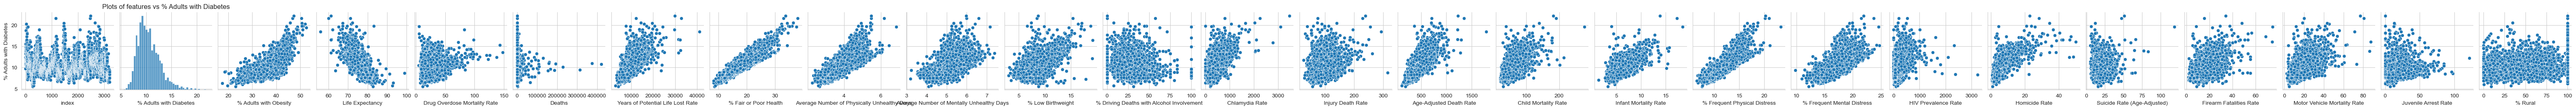

In [18]:
sns.pairplot(df, y_vars='% Adults with Diabetes')
plt.title('Plots of features vs % Adults with Diabetes')

plt.show()

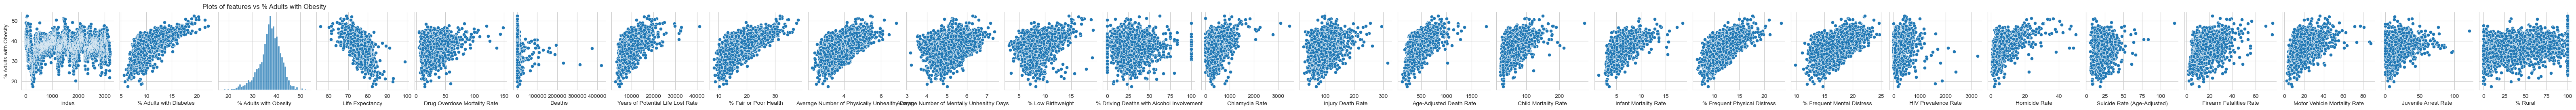

In [19]:
sns.pairplot(df, y_vars='% Adults with Obesity')
plt.title('Plots of features vs % Adults with Obesity')

plt.show()

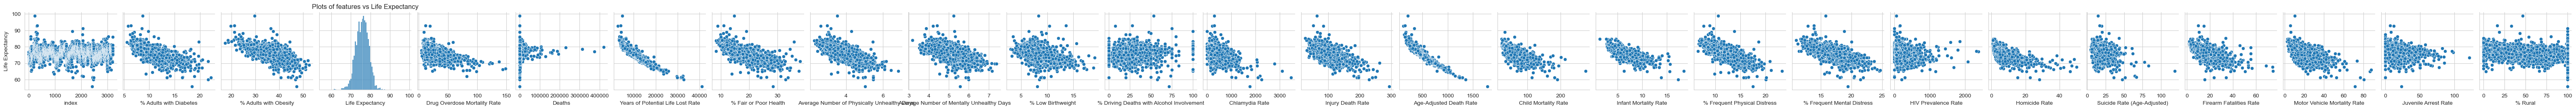

In [20]:
sns.pairplot(df, y_vars='Life Expectancy')
plt.title('Plots of features vs Life Expectancy')

plt.show()

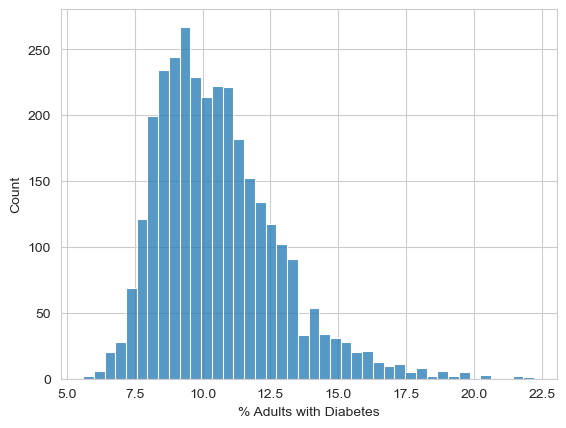

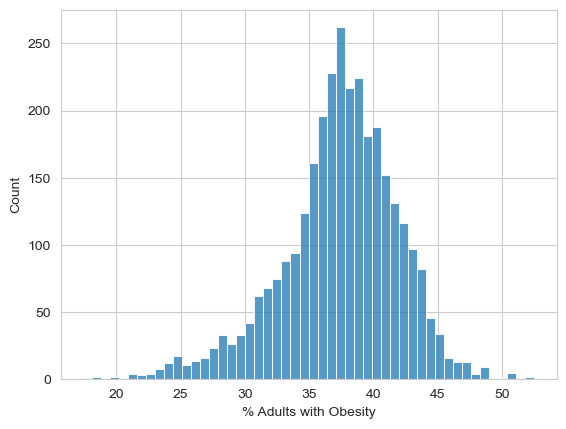

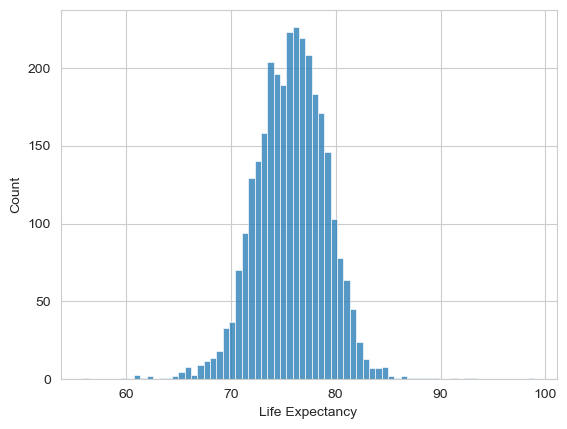

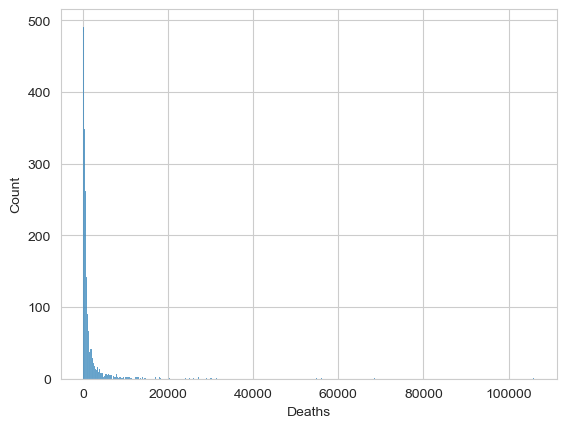

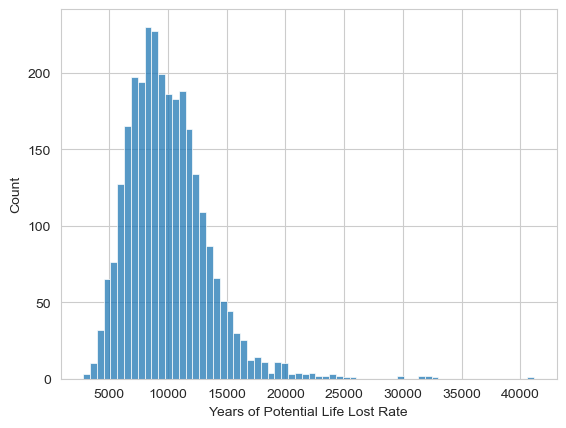

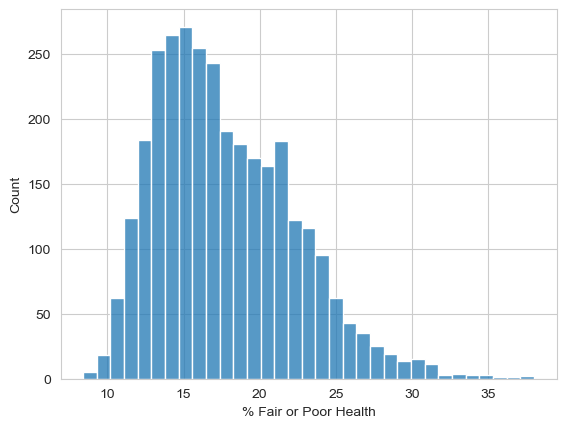

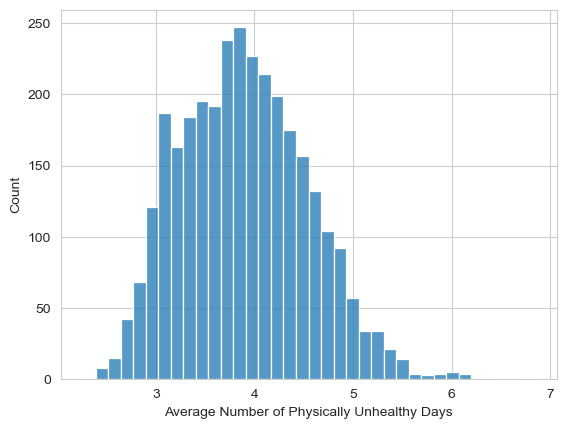

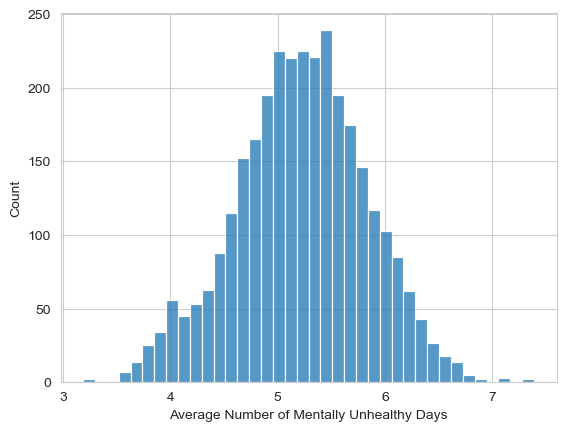

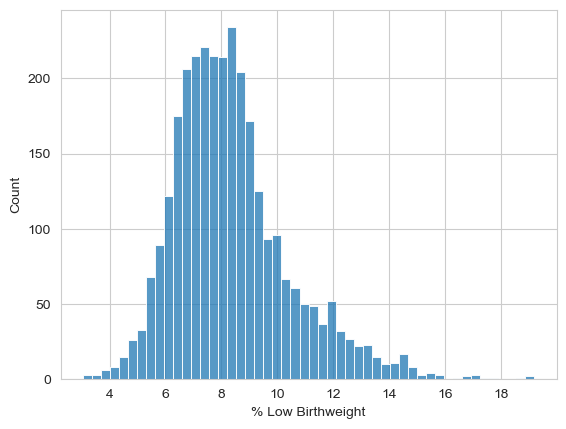

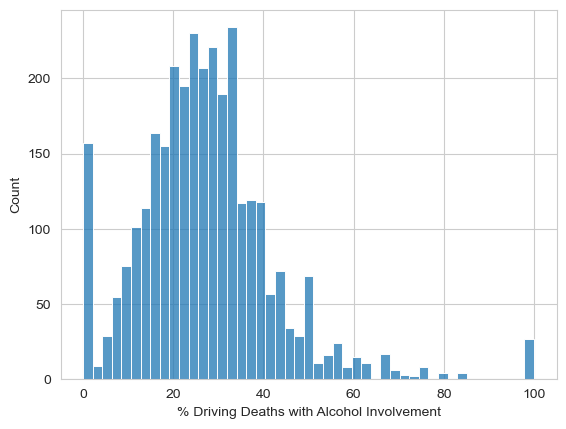

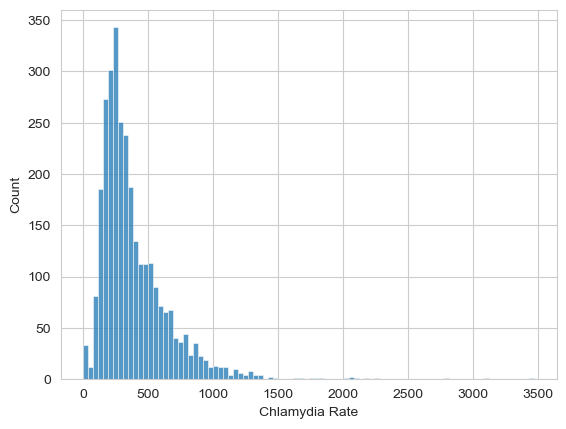

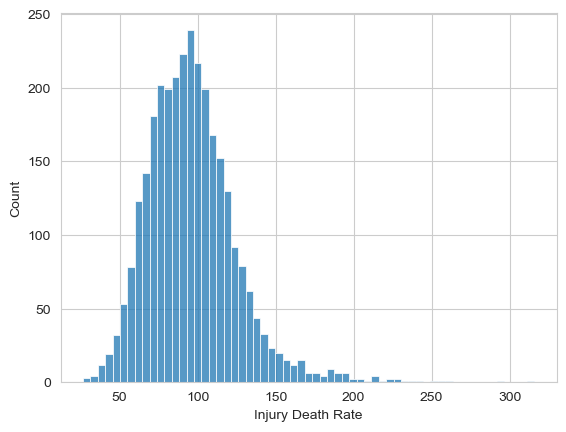

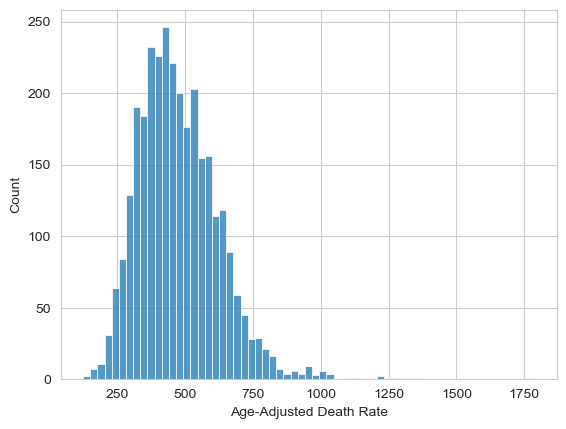

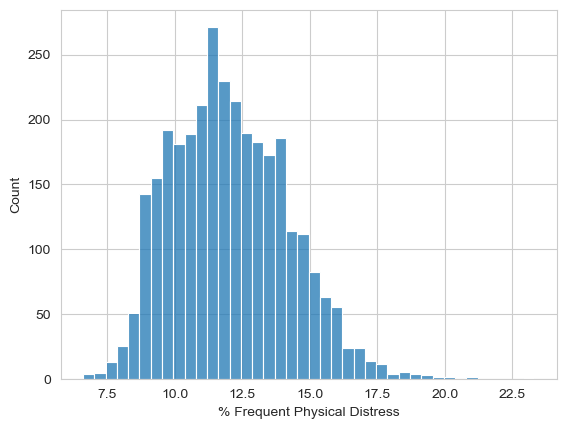

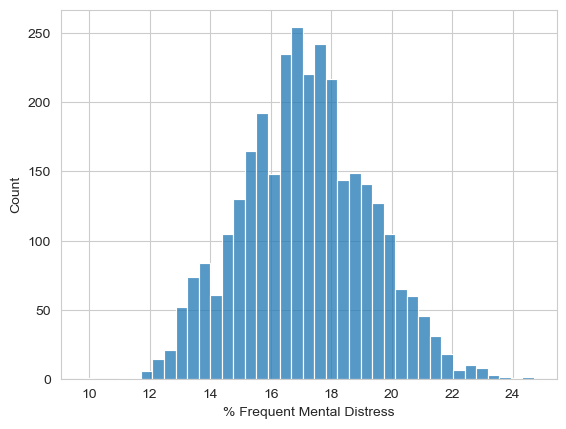

In [15]:
for column in df.columns:
    sns.histplot(df[column])
    plt.show()

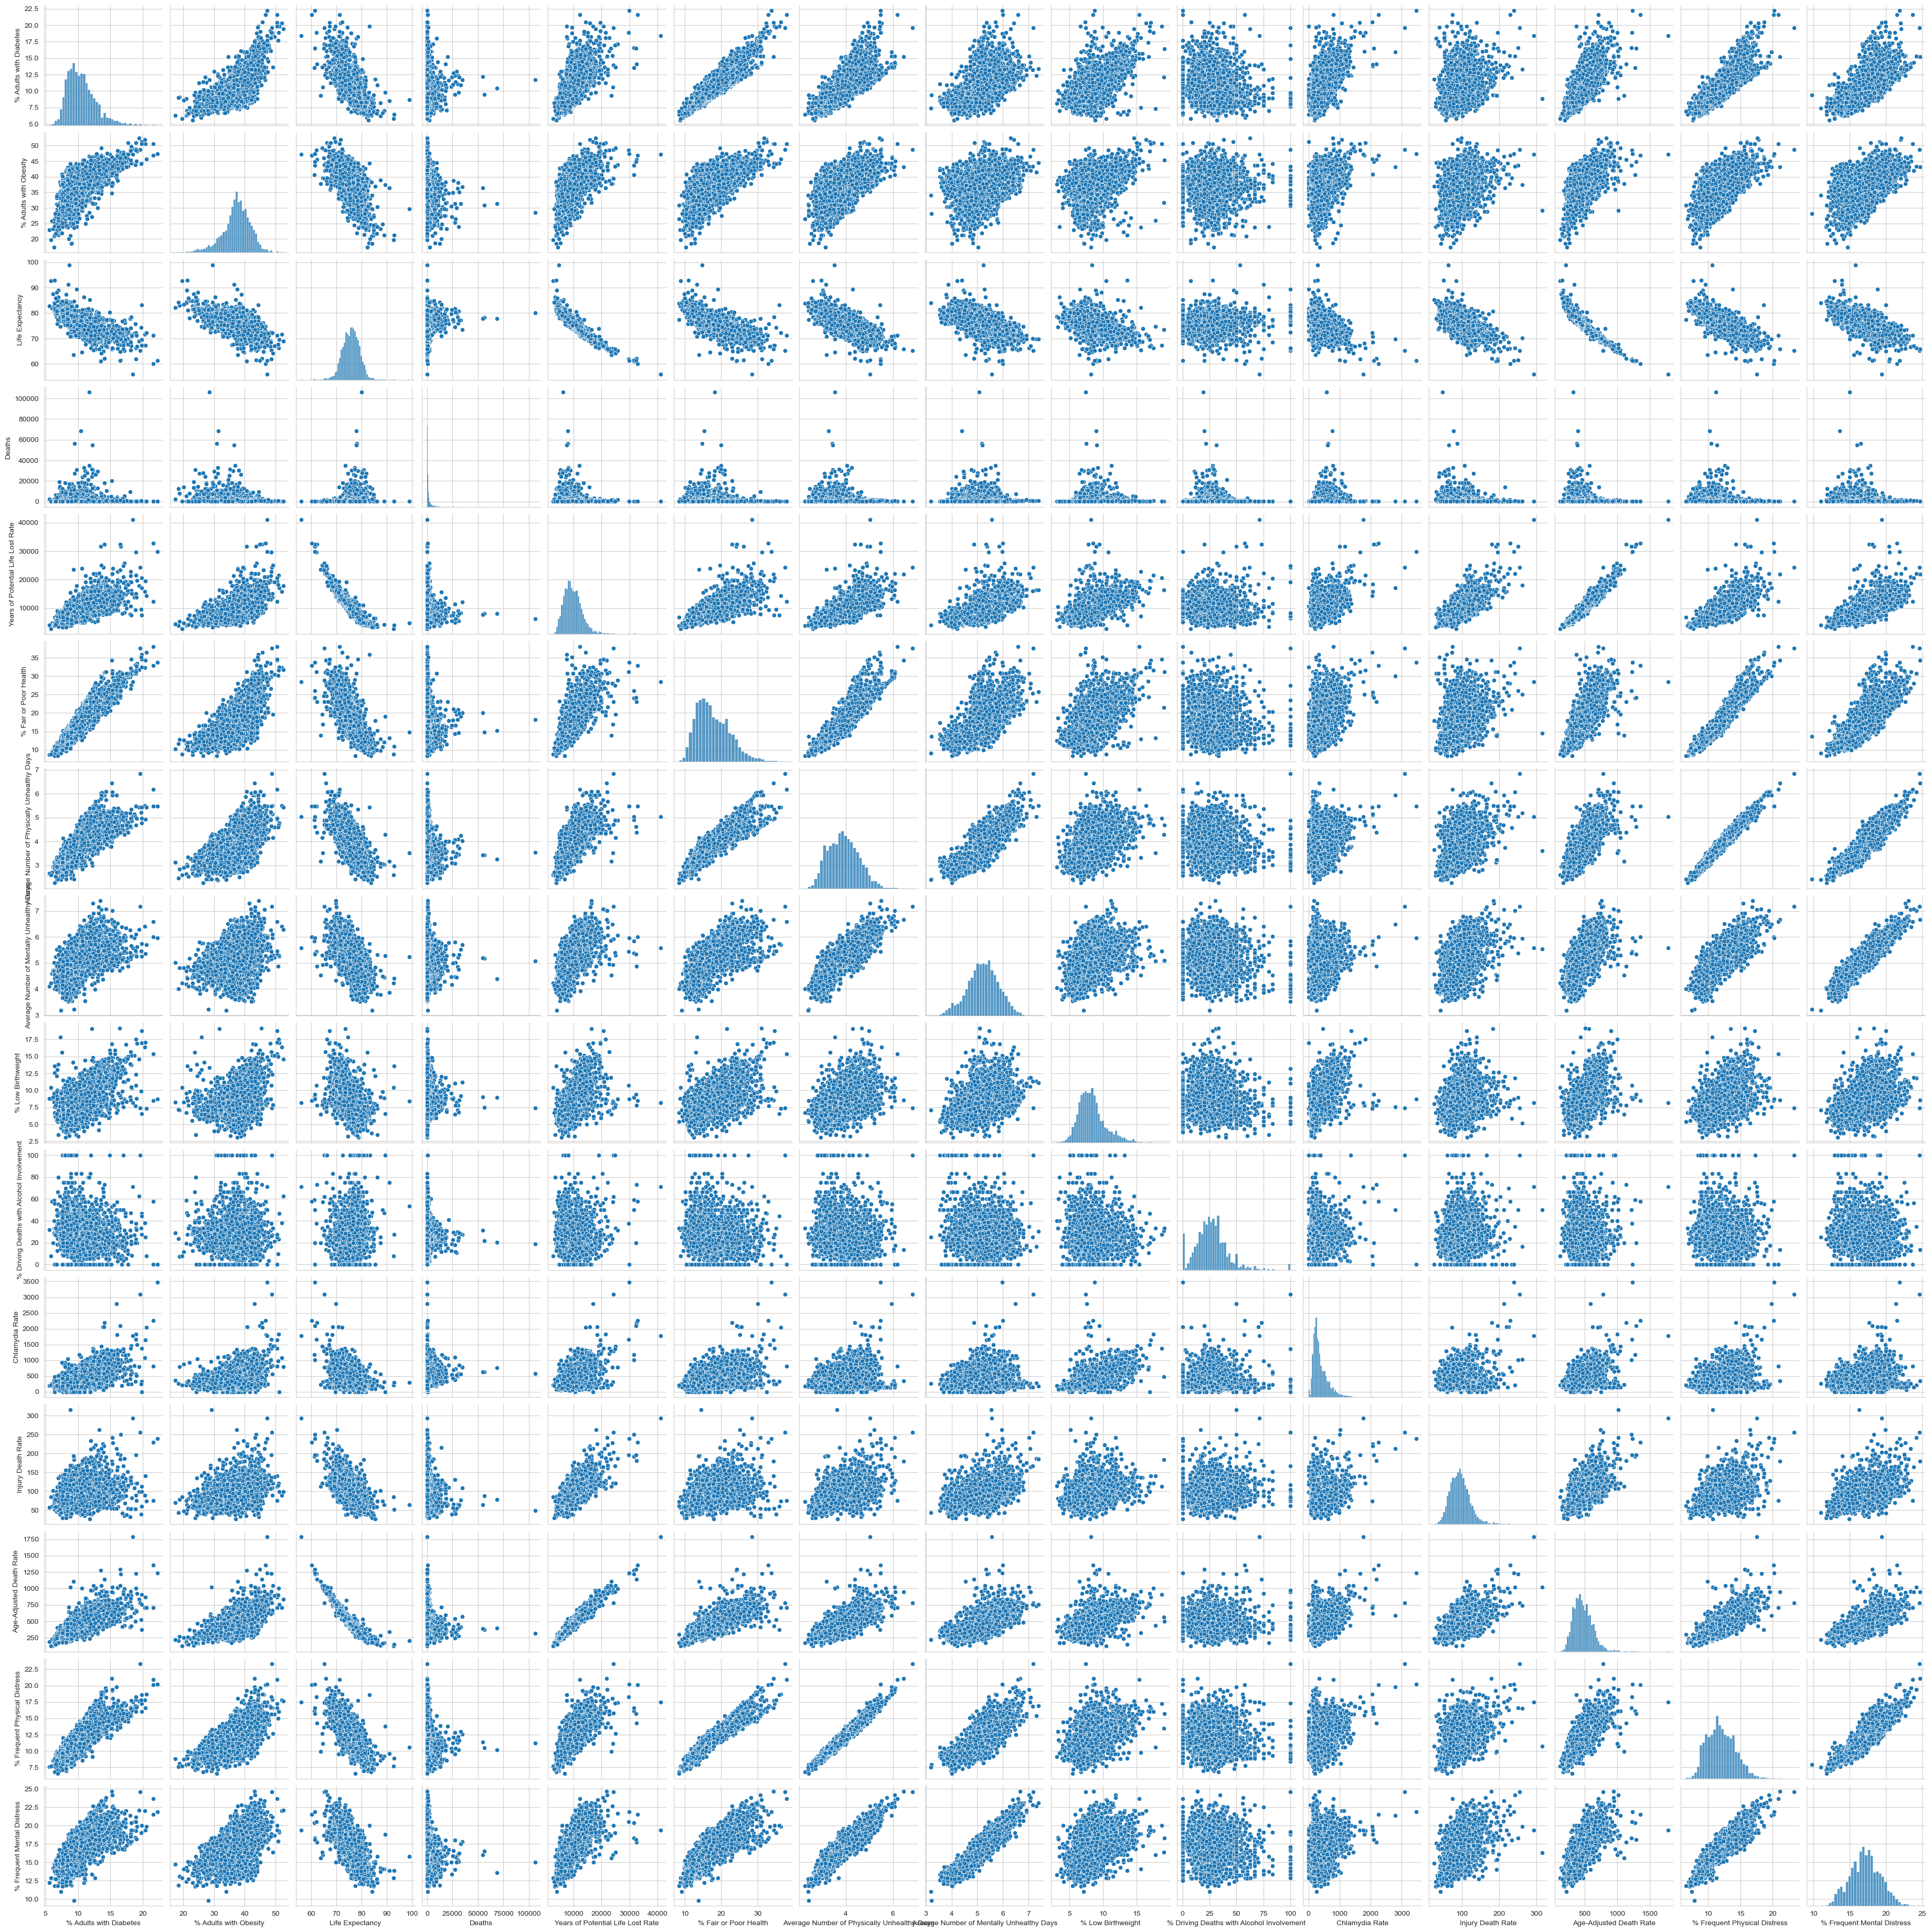

In [23]:
sns.pairplot(df)

In [18]:
df.describe()

% Adults with Diabetes  % Adults with Obesity  Life Expectancy  \
count             3143.000000            3143.000000      3070.000000   
mean                10.571429              37.352211        75.754919   
std                  2.249791               4.558616         3.433612   
min                  5.600000              17.400000        55.918958   
25%                  8.900000              35.100000        73.570987   
50%                 10.200000              37.700000        75.844154   
75%                 11.800000              40.300000        77.993948   
max                 22.200000              52.500000        98.902938   

              Deaths  Years of Potential Life Lost Rate  \
count    2886.000000                        2886.000000   
mean     1567.922037                        9955.095722   
std      4058.132622                        3450.041397   
min        48.000000                        2771.454704   
25%       260.000000                        7591.094331   
50%       544.500000                        9469.140915   
75%      1297.000000                       11768.437681   
max    105949.000000                       41152.261127   

       % Fair or Poor Health  Average Number of Physically Unhealthy Days  \
count            3143.000000                                  3143.000000   
mean               17.726026                                     3.896117   
std                 4.546610                                     0.647391   
min                 8.400000                                     2.261790   
25%                14.200000                                     3.397609   
50%                16.900000                                     3.874097   
75%                20.800000                                     4.338087   
max                38.000000                                     6.836834   

       Average Number of Mentally Unhealthy Days  % Low Birthweight  \
count                                3143.000000        3045.000000   
mean                                    5.217661           8.364015   
std                                     0.613475           2.093092   
min                                     3.185544           3.053435   
25%                                     4.818337           6.934307   
50%                                     5.235907           8.064516   
75%                                     5.631876           9.301075   
max                                     7.388805          19.178082   

       % Driving Deaths with Alcohol Involvement  Chlamydia Rate  \
count                                3116.000000     2998.000000   
mean                                   27.310365      387.639260   
std                                    15.228193      270.350458   
min                                     0.000000        0.000000   
25%                                    18.181818      214.400000   
50%                                    26.315789      310.900000   
75%                                    33.786912      494.750000   
max                                   100.000000     3467.600000   

       Injury Death Rate  Age-Adjusted Death Rate  \
count        3037.000000              3088.000000   
mean           96.210910               474.945044   
std            28.633899               149.221552   
min            26.625917               123.258695   
25%            76.886165               370.164859   
50%            93.577201               457.369584   
75%           111.198691               562.691862   
max           315.568022              1785.770896   

       % Frequent Physical Distress  % Frequent Mental Distress      % Rural  
count                   3143.000000                 3143.000000  3143.000000  
mean                      12.034553                   17.134298    64.078244  
std                        2.164349                    2.114063    33.602393  
min                        6.600000                    9.800000     0.000000

Possible outliers we may want to exclude:
- %Driving deaths with alcohol involvement max of 100% might not be useful
- Rates are likely per 100,000, or something along those lines

In [22]:
current_features = list(df.columns)

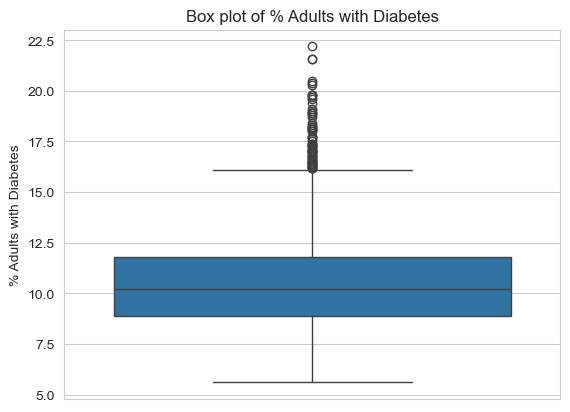

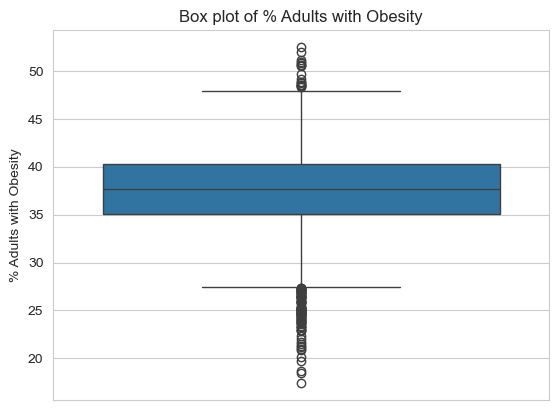

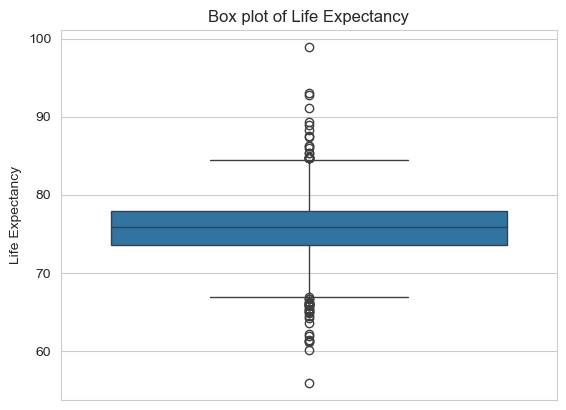

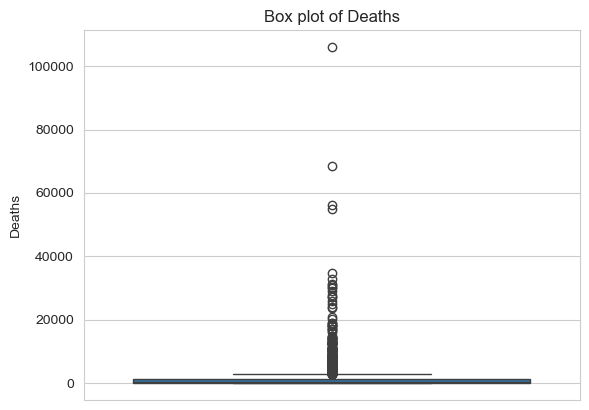

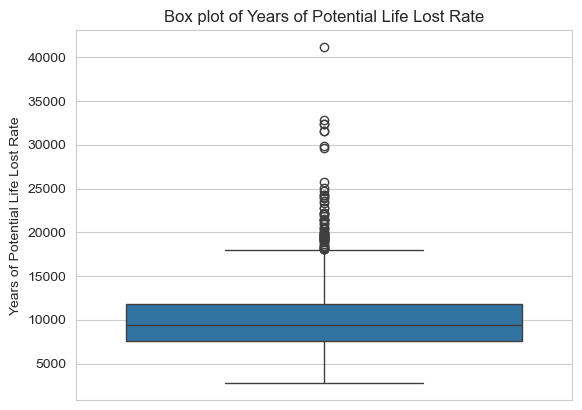

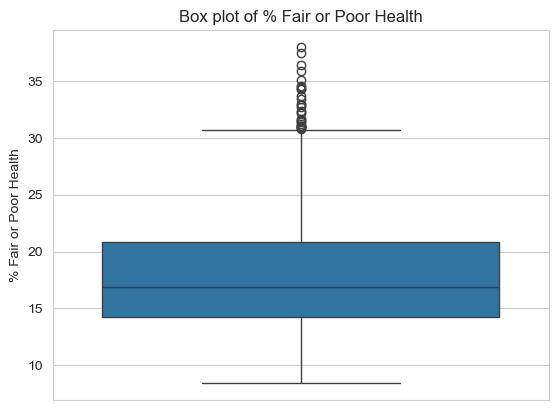

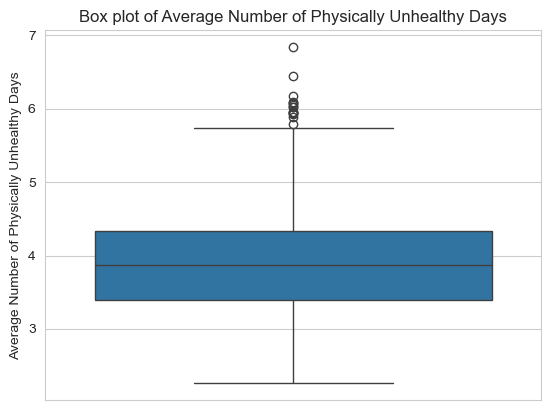

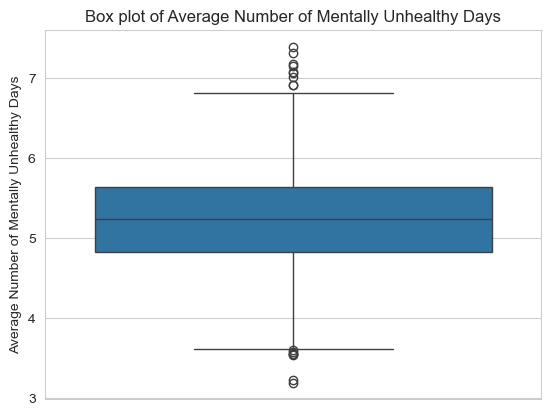

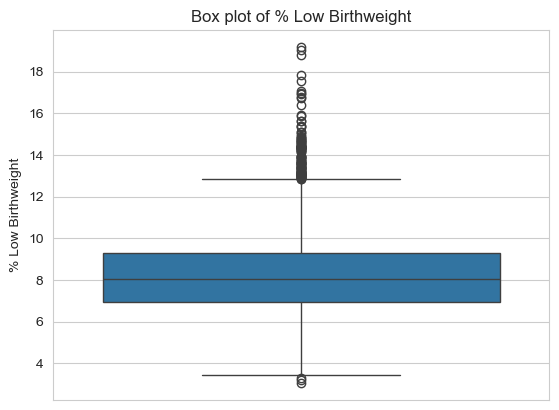

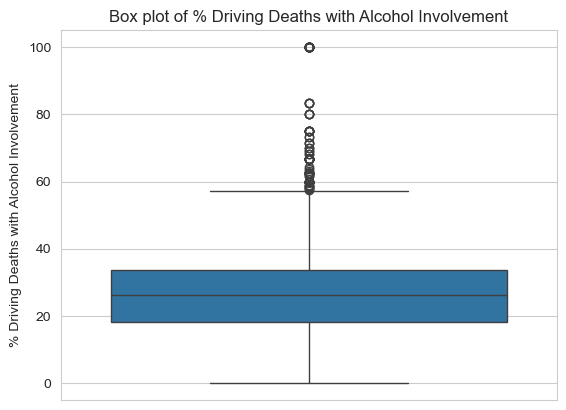

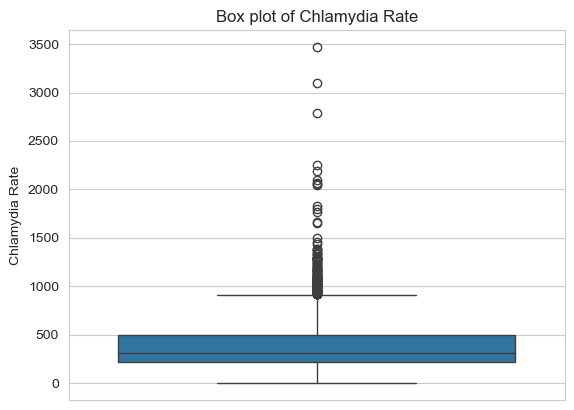

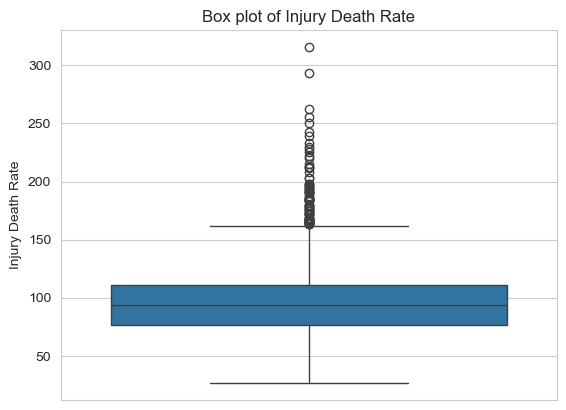

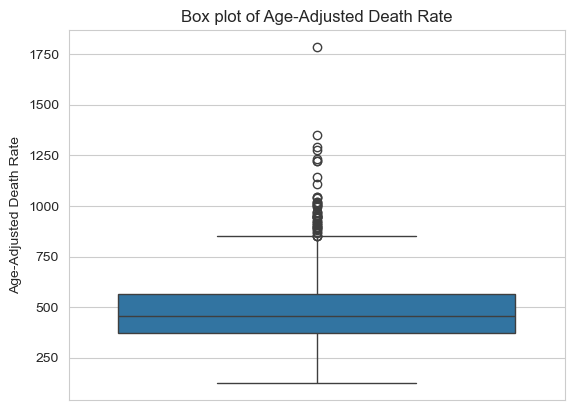

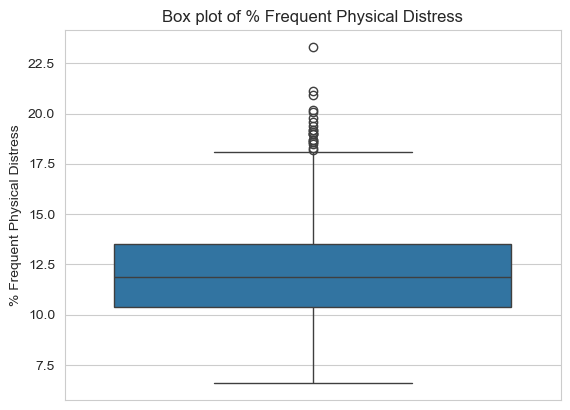

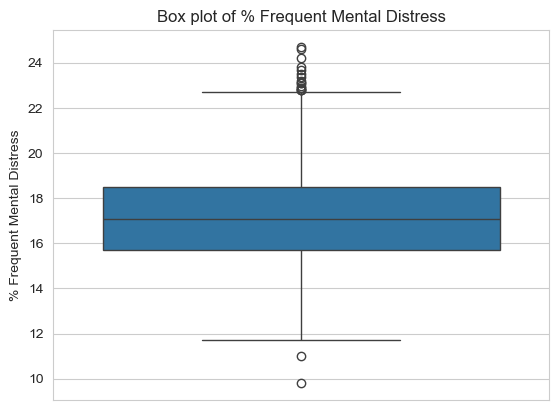

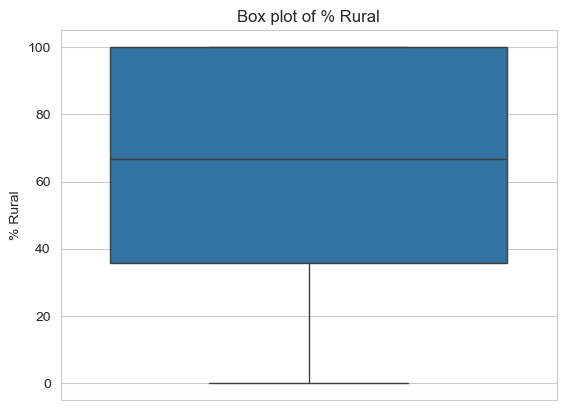

In [23]:
for feature in current_features:
    sns.boxplot(df, y=feature)
    plt.title(f'Box plot of {feature}')
    plt.show()

In [17]:
df.corr()

% Adults with Diabetes  \
% Adults with Diabetes                                     1.000000   
% Adults with Obesity                                      0.678634   
Life Expectancy                                           -0.719791   
Deaths                                                    -0.033346   
Years of Potential Life Lost Rate                          0.728079   
% Fair or Poor Health                                      0.927549   
Average Number of Physically Unhealthy Days                0.769955   
Average Number of Mentally Unhealthy Days                  0.554967   
% Low Birthweight                                          0.620655   
% Driving Deaths with Alcohol Involvement                 -0.104795   
Chlamydia Rate                                             0.592601   
Injury Death Rate                                          0.312471   
Age-Adjusted Death Rate                                    0.757939   
% Frequent Physical Distress                               0.831472   
% Frequent Mental Distress                                 0.666093   
% Rural                                                    0.123480   

                                             % Adults with Obesity  \
% Adults with Diabetes                                    0.678634   
% Adults with Obesity                                     1.000000   
Life Expectancy                                          -0.637055   
Deaths                                                   -0.240820   
Years of Potential Life Lost Rate                         0.572179   
% Fair or Poor Health                                     0.659009   
Average Number of Physically Unhealthy Days               0.575615   
Average Number of Mentally Unhealthy Days                 0.357704   
% Low Birthweight                                         0.340932   
% Driving Deaths with Alcohol Involvement                -0.031665   
Chlamydia Rate                                            0.319771   
Injury Death Rate                                         0.275810   
Age-Adjusted Death Rate                                   0.612215   
% Frequent Physical Distress                              0.615123   
% Frequent Mental Distress                                0.534051   
% Rural                                                   0.296500   

                                             Life Expectancy    Deaths  \
% Adults with Diabetes                             -0.719791 -0.033346   
% Adults with Obesity                              -0.637055 -0.240820   
Life Expectancy                                     1.000000  0.148519   
Deaths                                              0.148519  1.000000   
Years of Potential Life Lost Rate                  -0.935440 -0.126731   
% Fair or Poor Health                              -0.753522 -0.102008   
Average Number of Physically Unhealthy Days        -0.746420 -0.156276   
Average Number of Mentally Unhealthy Days          -0.625695 -0.077204   
% Low Birthweight                                  -0.525551  0.029547   
% Driving Deaths with Alcohol Involvement           0.076686 -0.027372   
Chlamydia Rate                                     -0.436288  0.156633   
Injury Death Rate                                  -0.621606 -0.124636   
Age-Adjusted Death Rate                            -0.959762 -0.139231   
% Frequent Physical Distress                       -0.768718 -0.156915   
% Frequent Mental Distress                         -0.732485 -0.166341   
% Rural                                            -0.229767 -0.423474   

                                             Years of Potential Life Lost Rate  \
% Adults with Diabetes                                                0.728079   
% Adults with Obesity                                                 0.572179   
Life Expectancy                                                      -0.935440   
Deaths                                                     